In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://gist.githubusercontent.com/Thiagobc23/0bc5c5f530e8f8fd98710fe1ccb407ce/raw/4e084668a83ab9d0a0ace1425742835a0563bcef/quality.csv'
df = pd.read_csv(url)

df_unit = df.groupby('Unit').mean().reset_index()
df_unit = df_unit.sort_values('Quality Score', ascending=False)

print('Dataset: \n', df.head())
print('\n Averages: \n', df_unit.head())

Dataset: 
     Unit  Quality Score
0  Alpha         625.33
1  Alpha         382.06
2  Alpha         494.15
3  Alpha         520.27
4  Alpha         703.93

 Averages: 
       Unit  Quality Score
0    Alpha     535.161590
1     Beta     512.512563
4     Echo     506.879783
2  Charlie     483.661961
3    Delta     461.163131


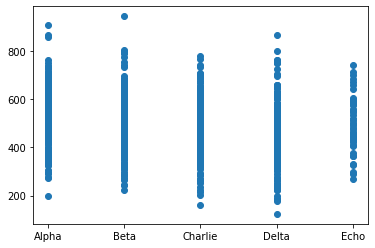

In [3]:
plt.scatter(df['Unit'], df['Quality Score'])

<Axes: xlabel='Unit', ylabel='Quality Score'>

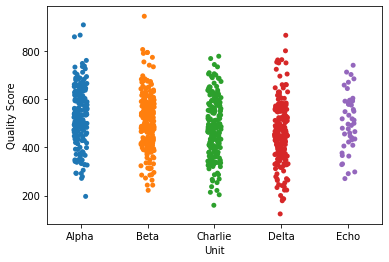

In [4]:
sns.stripplot(x='Unit', y='Quality Score', data=df)

<Axes: xlabel='Quality Score', ylabel='Unit'>

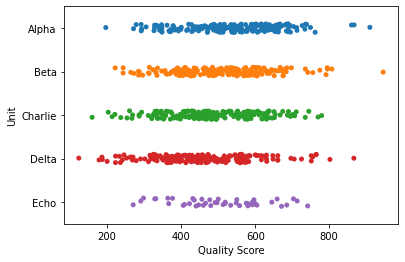

In [5]:
sns.stripplot(x='Quality Score', y='Unit', data=df)

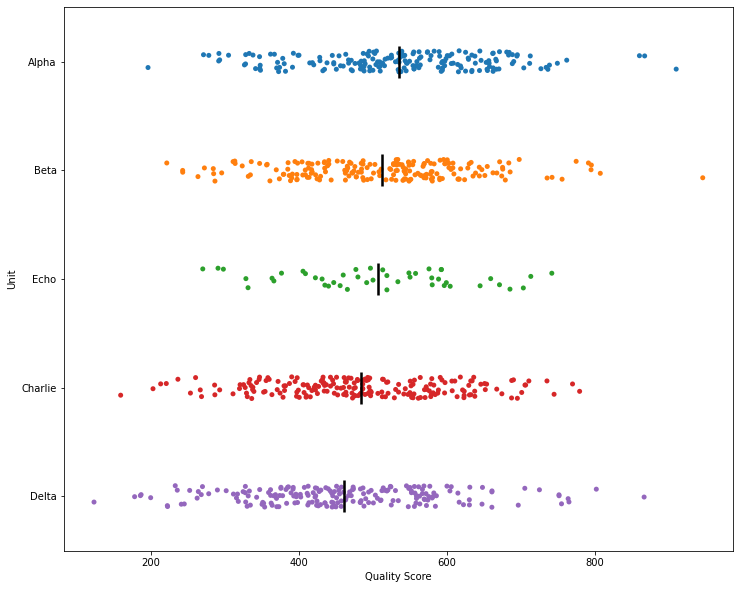

In [6]:
# list with ordered categories
order = df_unit['Unit']
fig, ax = plt.subplots(1, figsize=(12,10))
# Plot lines for the average
sns.scatterplot(y='Unit', x='Quality Score', data=df_unit, marker='|', s=1000, color='k')
# Jitter plot
sns.stripplot(y='Unit', x='Quality Score', data=df, order=order, zorder=0)
plt.show()

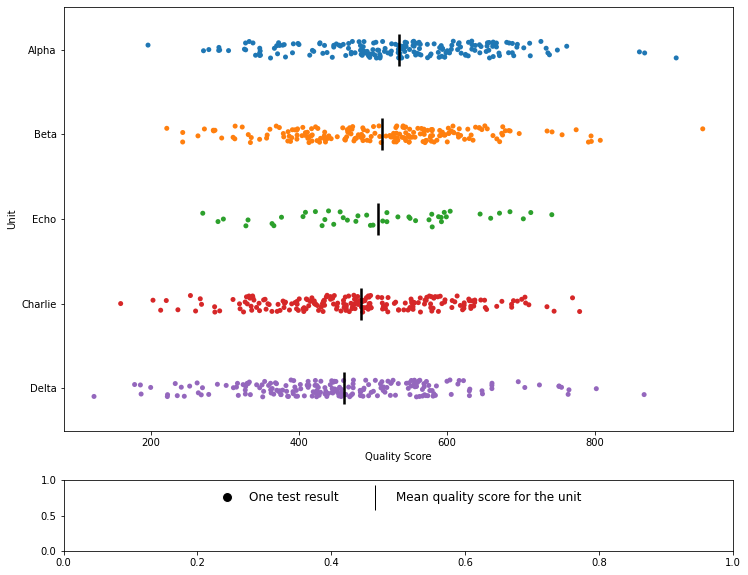

In [7]:
from matplotlib.lines import Line2D
fig, (ax, ax_leg) = plt.subplots(2, figsize=(12,10), gridspec_kw={'height_ratios':[6, 1]})
# Plot lines for the average
sns.scatterplot(y='Unit', x='Quality Score', data=df_unit, marker='|', s=1000, color='k', ax=ax)
# Jitter plot
sns.stripplot(y='Unit', x='Quality Score', data=df, order=order, zorder=0, ax=ax)
# Custom Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='One test result', 
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='|', color='k', 
                          label='Mean quality score for the unit', 
                          linestyle='None', markersize=25)]
legend = ax_leg.legend(handles=legend_elements, loc='upper center', 
                       ncol=2, frameon=False, fontsize=12)
plt.show()

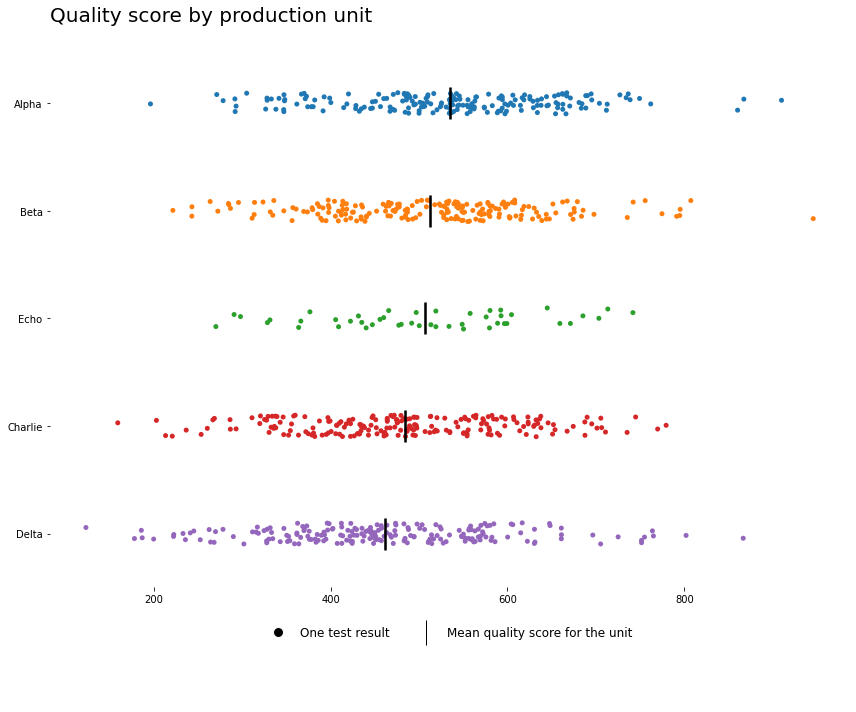

In [8]:
fig, (ax, ax_leg) = plt.subplots(2, figsize=(12,10), gridspec_kw={'height_ratios':[6, 1]})
# Plot lines for the average
sns.scatterplot(y='Unit', x='Quality Score', data=df_unit, marker='|', s=1000, color='k', ax=ax)
# Jitter plot
sns.stripplot(y='Unit', x='Quality Score', data=df, order=order, zorder=0, ax=ax)
# custom Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='One test result', 
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='|', color='k', 
                          label='Mean quality score for the unit', 
                          linestyle='None', markersize=25)]
legend = ax_leg.legend(handles=legend_elements, loc='upper center', 
                       ncol=2, frameon=False, fontsize=12)
ax_leg.set_xticks([])
ax_leg.set_yticks([])
# remove spines
sns.despine(fig, left=True, top=True, right=True, bottom=True)
# title and labels
ax.set_title('Quality score by production unit\n', loc='left', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
# make it tight (:
plt.tight_layout()
plt.show()